In [21]:
import pandas as pd

In [22]:
data = pd.read_csv("learningSet.csv")

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_15327/26662842.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("learningSet.csv")


In [23]:
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


Check for null values in all the columns

In [25]:
null_counts = data.isnull().sum()
print("Null Value Counts:\n", null_counts)

Null Value Counts:
 ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64


Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. 

In [27]:
drop_list = []

In [28]:
drop_list.extend(['OSOURCE', 'ZIP'])
data = data.drop(columns=drop_list)

Identify columns that over 85% missing values

In [30]:
missing_cols = data.columns[data.isnull().mean() > 0.85]

In [31]:
missing_cols

Index(['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7',
       'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21',
       'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7',
       'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21',
       'RAMNT_23'],
      dtype='object')

Remove those columns from the dataframe

In [32]:
data = data.drop(columns=missing_cols)

In [33]:
data

,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,,,3712,0,,,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,,,5202,0,,,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,,,0,0,,,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,,,2801,0,,,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,,,2001,0,X,X,,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,AK,,,0,0,,,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,1,TX,,,5001,0,,,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,1,MI,,,3801,0,,X,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,0,CA,,,4005,0,X,,,...,18.0,1,L,4,F,X,X,X,11.0,A


Reduce the number of categories in the column GENDER. The column should only have either "M" for males, 
 "F" for females, and "other" for all the rest

In [35]:
print(data['GENDER'].value_counts())
data['GENDER'] = data['GENDER'].fillna('F')
data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'other')
print(data['GENDER'].value_counts())


F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64
F        51277
M        39094
other     5041
Name: GENDER, dtype: int64


In [36]:
import matplotlib.pyplot as plt

Check for null values in the numerical columns.

In [37]:
numerical_null_counts = data.select_dtypes(include='number').isnull().sum()
print("Null Value Counts in Numerical Columns:\n", numerical_null_counts)

Null Value Counts in Numerical Columns:
 ODATEDW         0
TCODE           0
DOB             0
AGE         23665
INCOME      21286
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 382, dtype: int64


Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.


In [38]:
most_frequent_geocode2 = data['GEOCODE2'].mode()[0]
data['GEOCODE2'] = data['GEOCODE2'].fillna(most_frequent_geocode2)

In [39]:
median_wealth1 = data['WEALTH1'].median()
data['WEALTH1'] = data['WEALTH1'].fillna(median_wealth1)

In [40]:
median_adi = data['ADI'].median()
data['ADI'] = data['ADI'].fillna(median_adi)

In [41]:
most_frequent_dma = data['DMA'].mode()[0]
data['DMA'] = data['DMA'].fillna(most_frequent_dma)

In [42]:
most_frequent_msa = data['MSA'].mode()[0]
data['MSA'] = data['MSA'].fillna(most_frequent_msa)

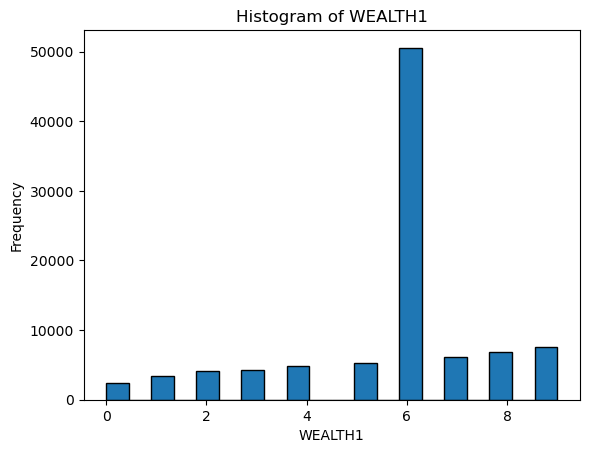

In [43]:
plt.hist(data['WEALTH1'].dropna(), bins=20, edgecolor='k')
plt.xlabel('WEALTH1')
plt.ylabel('Frequency')
plt.title('Histogram of WEALTH1')
plt.show()

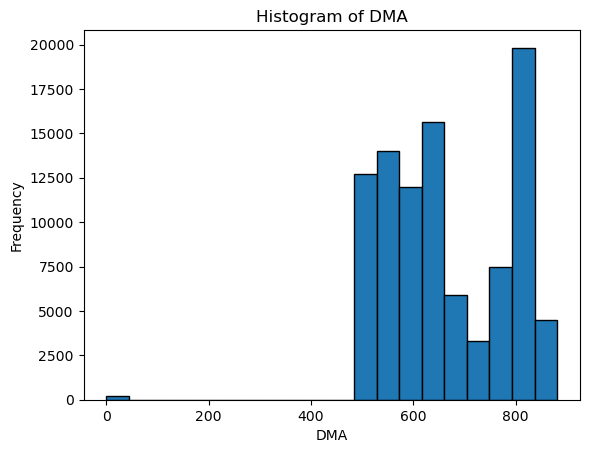

In [44]:
plt.hist(data['DMA'].dropna(), bins=20, edgecolor='k')
plt.xlabel('DMA')
plt.ylabel('Frequency')
plt.title('Histogram of DMA')
plt.show()